# Bike Sharing Assignment

## Bike Sharing Assignment: Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


**`They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:`**

><font color = blue>***1. Which variables are significant in predicting the demand for shared bikes.***</font>

><font color = blue>***2. How well those variables describe the bike demands***</font>

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

### Business Goal:

**`You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.`**

# Data understanding, preparation and EDA

## Import required libraries

In [867]:
# Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set(style="whitegrid")

## Load the data

In [868]:
# Load the bike sharing data
bike_data = pd.read_csv('day.csv')

## Explore and understand the data

In [869]:
# Check the attributes of the bike data
print(bike_data.shape)
print(bike_data.info())
print(bike_data.dtypes)

(730, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None
instant         int64
dteday         object
season          int64
yr          

In [870]:
# Check head of the data for multiple header
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [871]:
# Check tail of the data for multiple footer rows
bike_data.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [872]:
# Check for empty rows and columns
print(bike_data.isnull().all(axis=1).sum())
print(bike_data.isnull().all(axis=0).sum())

0
0


In [873]:
# Columns having single value?
bike_data.columns[bike_data.nunique() == 1]

Index([], dtype='object')

In [874]:
# Drop the irrelevant columns identified

irrelevant_columns = ['instant', 'dteday', 'casual', 'registered']
bike_data.drop(irrelevant_columns, axis=1, inplace=True)

### Observations:
1. No summary rows or multiple header and footer rows.
2. Columns are a mix of integer, floats and one object.
3. No NAN values
4. 'instant' is record index and can be dropped.
5. 'dteday' is date which is already captured in year, month, weekday, workingday etc. Hence, it can be dropped.
6. The 'cnt' variable indicates the total number of bike rentals, including both 'casual' and 'registered'. Hence 'casual' and 'registered' variables can be dropped and 'cnt' can be taken as target variable.

## Data Visualization

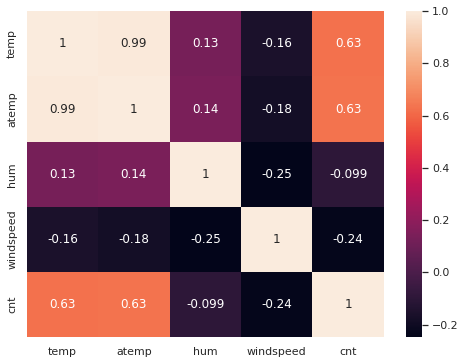

In [875]:
# Correlation between different continous variables

bike_data_continous = bike_data[['temp', 'atemp', 'hum', 'windspeed', 'cnt']]

plt.figure(figsize=(8,6))
corrMatrix = bike_data_continous.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [876]:
# temp and atemp are highly collerated (~99%), hence dropping atemp
bike_data.drop('atemp', axis=1, inplace=True)

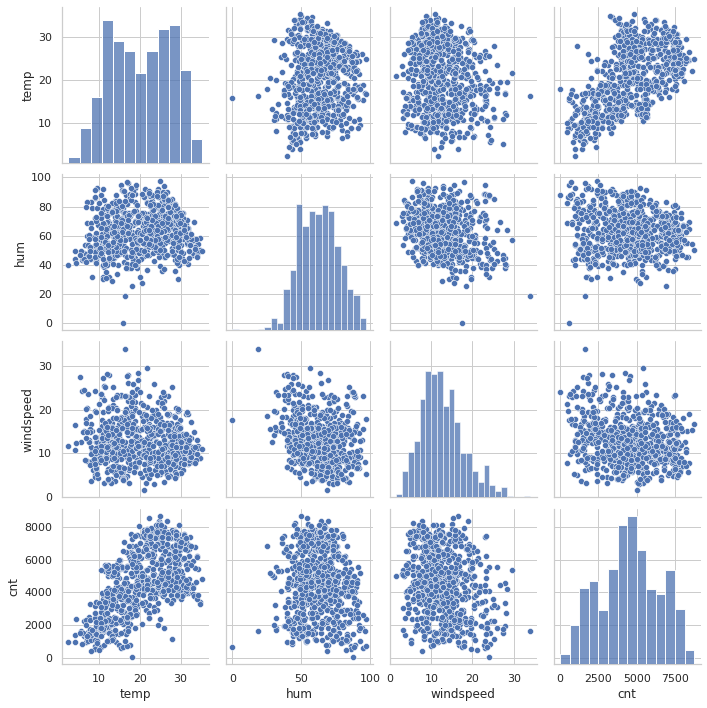

In [877]:
# Pair plot of all the numerical variables

sns.pairplot(bike_data[['temp', 'hum', 'windspeed', 'cnt']])
plt.show()

In [878]:
# Assign 'category' variables with meaningful names based on data dictionary

bike_data['season'] = bike_data['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike_data['mnth'] = bike_data['mnth'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
bike_data['weekday'] = bike_data['weekday'].map({5:'sun',6:'mon',0:'tue',1:'wed',2:'thu',3:'fri',4:'sat'})
bike_data['weathersit'] = bike_data['weathersit'].map({1:"Clear_Few_Clouds",2:"Mist_Cloudy",3:"Light_Snow_Rain",4:'Heavy_Rain_Ice_Thunderstorm_Mist'})

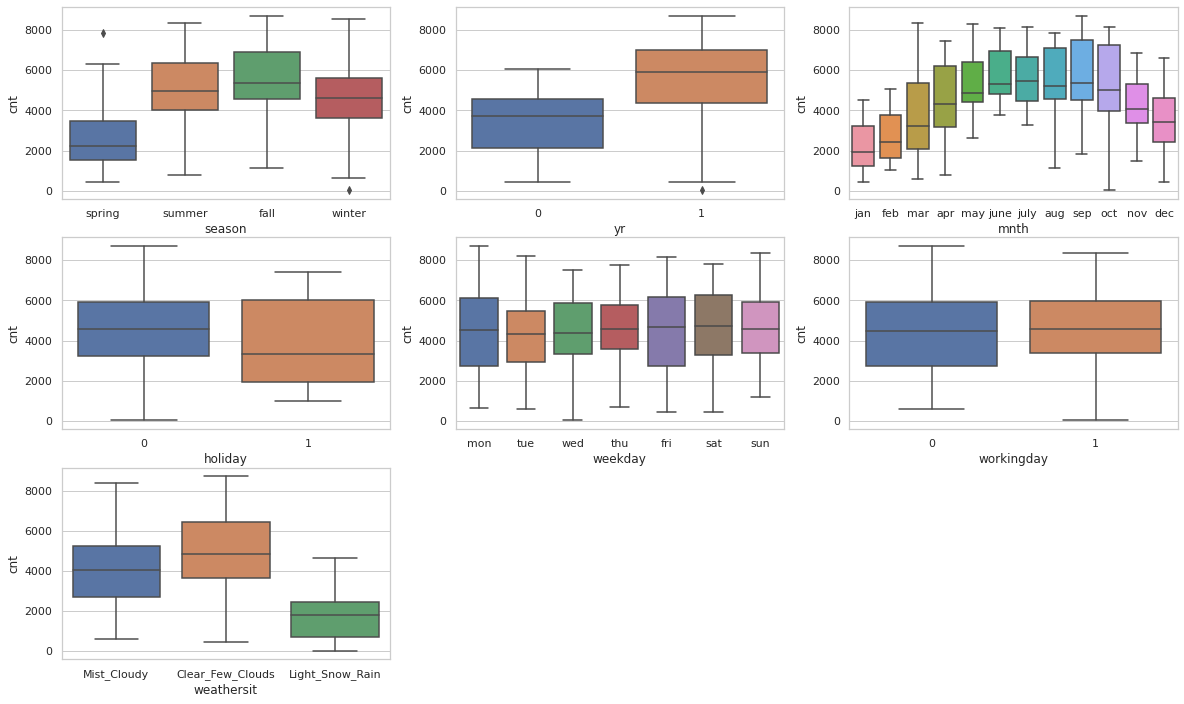

In [879]:
# Visualizing categorical variables using boxplot

plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_data)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_data)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_data)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_data)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_data)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_data)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_data)
plt.show()

### Observations:
1. temp and cnt have a linear correlation.
2. Season falls have the highest number of bookings for the period of two years with a median of over 5000 bookings. It could be significant in predicting the demand for shared bikes.
3. Year has increasing bookings from 2018 to 2019. It could be significant in predicting the demand for shared bikes.
4. Month variable shows a higher trend in the middle months of 5-9 with a median of over 4000 bookings per month. It could be significant in predicting the demand for shared bikes.
5. The holiday variable doesn't look helpful as most of the bookings are happening during the holiday season.
6. Weekday variable also doesn't show any clear trend, it could have little or no significance.
7. Working day has around 70-30 split for the period of 2 years.
8. Clear weather definitely has more number of bookings, it could be a good predictor.

## Data Preparation

In [880]:
# Drop duplicate values if any

bike_data.drop_duplicates()
bike_data.shape

(730, 11)

### Create dummy variables for all categorical features

In [881]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [882]:
# Let's create dummies variables and drop the first column from  using 'drop_first = True'
# yr, holiday, workingday are already having binary values hence we don't need to create dummy variable for them.

bike_data = pd.get_dummies(bike_data,drop_first=True)


In [883]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          730 non-null    int64  
 1   holiday                     730 non-null    int64  
 2   workingday                  730 non-null    int64  
 3   temp                        730 non-null    float64
 4   hum                         730 non-null    float64
 5   windspeed                   730 non-null    float64
 6   cnt                         730 non-null    int64  
 7   season_spring               730 non-null    uint8  
 8   season_summer               730 non-null    uint8  
 9   season_winter               730 non-null    uint8  
 10  mnth_aug                    730 non-null    uint8  
 11  mnth_dec                    730 non-null    uint8  
 12  mnth_feb                    730 non-null    uint8  
 13  mnth_jan                    730 non

In [884]:
bike_data.shape

(730, 29)

### Splitting the Data into Training and Testing Sets

In [885]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(bike_data, train_size = 0.70, test_size = 0.30, random_state = 100)

In [886]:
print(df_train.shape)
print(df_test.shape)

(510, 29)
(219, 29)


### Rescaling the Features 

In [887]:
from sklearn.preprocessing import MinMaxScaler

In [888]:
scaler = MinMaxScaler()

In [889]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [890]:
# Checking values after scaling if they lie between 0 and 1 or not
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [891]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


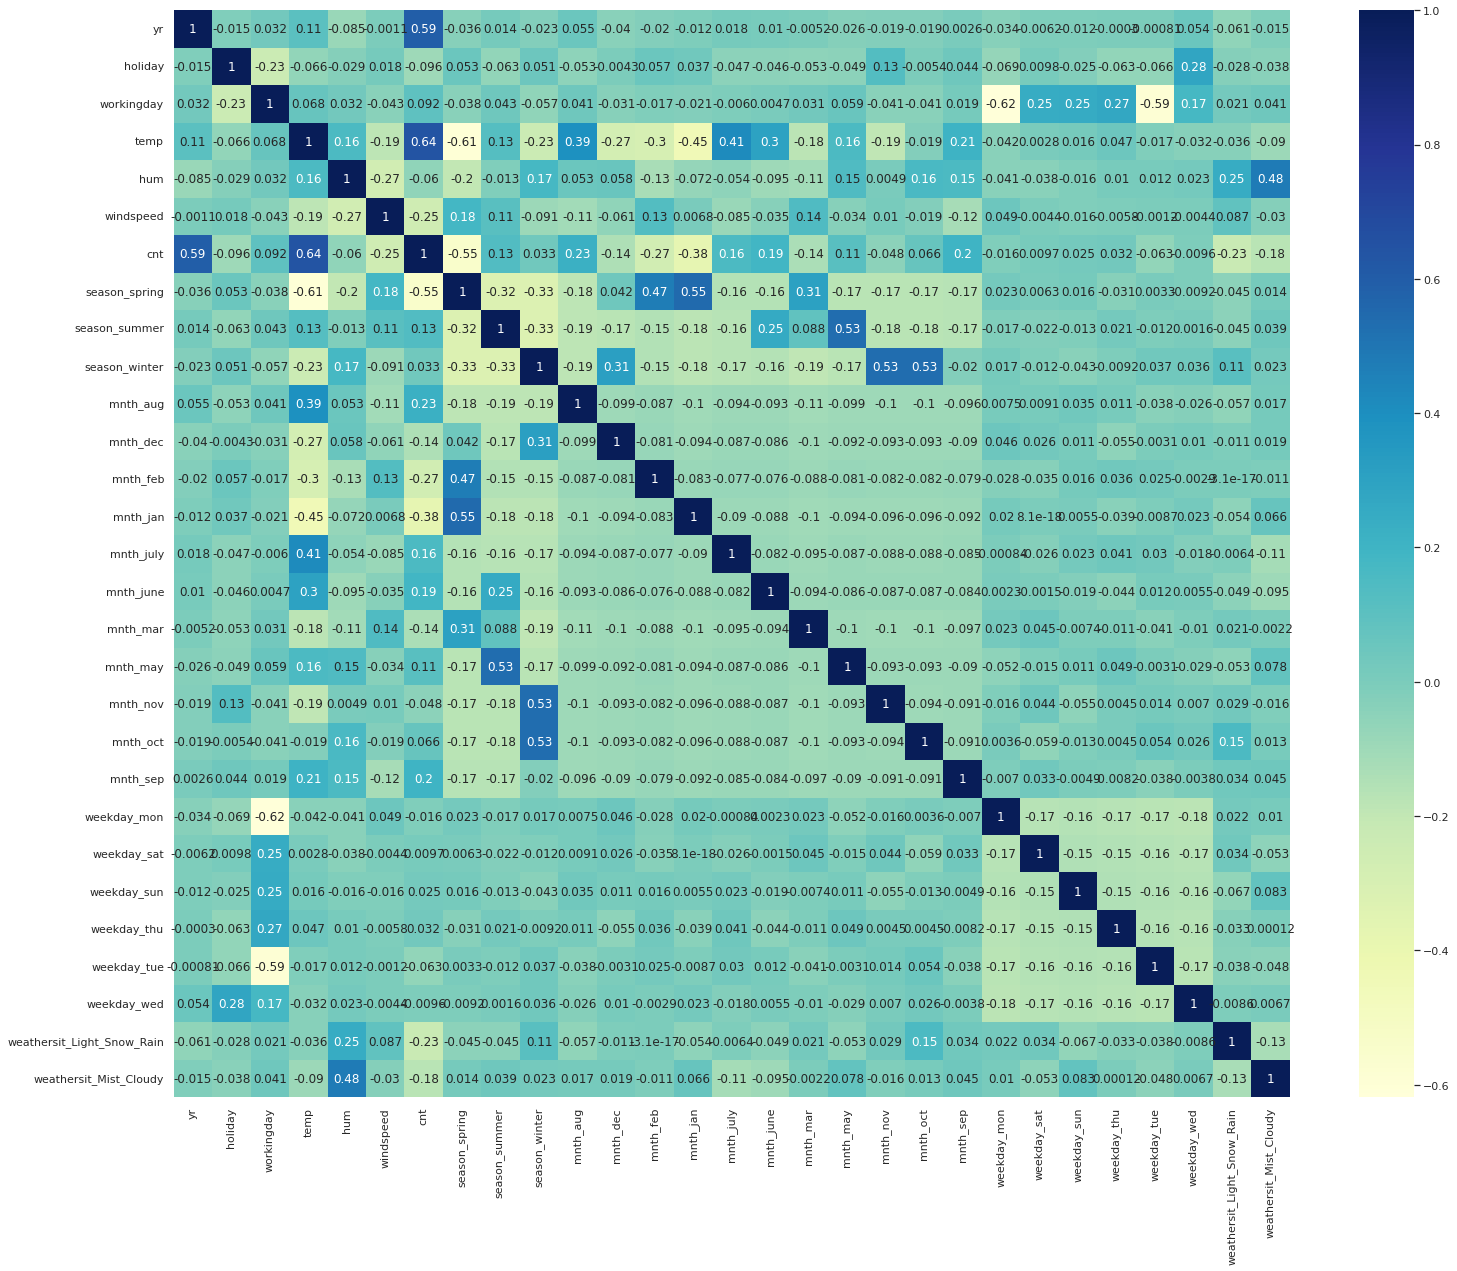

In [892]:
# Let's check the correlation coefficients to see which variables are highly correlated
# round(df_train.corr(), 2)
plt.figure(figsize = (25, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dividing into X and Y sets for the model building

In [893]:
y_train = df_train.pop('cnt')
X_train = df_train

## Building our model

### RFE
Recursive feature elimination

In [894]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [895]:
# Running RFE with the output number of the variable 14
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [896]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 2),
 ('season_winter', True, 1),
 ('mnth_aug', False, 8),
 ('mnth_dec', False, 5),
 ('mnth_feb', False, 6),
 ('mnth_jan', False, 3),
 ('mnth_july', True, 1),
 ('mnth_june', False, 12),
 ('mnth_mar', False, 15),
 ('mnth_may', False, 7),
 ('mnth_nov', False, 4),
 ('mnth_oct', False, 13),
 ('mnth_sep', True, 1),
 ('weekday_mon', True, 1),
 ('weekday_sat', False, 14),
 ('weekday_sun', False, 11),
 ('weekday_thu', False, 10),
 ('weekday_tue', True, 1),
 ('weekday_wed', False, 9),
 ('weathersit_Light_Snow_Rain', True, 1),
 ('weathersit_Mist_Cloudy', True, 1)]

In [897]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_july', 'mnth_sep',
       'weekday_mon', 'weekday_tue', 'weathersit_Light_Snow_Rain',
       'weathersit_Mist_Cloudy'],
      dtype='object')

In [898]:
X_train.columns[~rfe.support_]

Index(['season_summer', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_june', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_wed'],
      dtype='object')

### Observations
1. RFE method has successfully evaluated top 14 predictors which are significant.
2. We will continue validating these features manually elemenating them one by one based on p-value and VIF and further building models.

### Building model using statsmodel, for the detailed statistics

### Model 1

In [899]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [900]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_sm = sm.add_constant(X_train_rfe)

In [901]:
lm = sm.OLS(y_train,X_train_sm).fit()   # Running the linear model

In [902]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.6
Date:                Tue, 11 Oct 2022   Prob (F-statistic):          3.81e-190
Time:                        11:56:34   Log-Likelihood:                 511.45
No. Observations:                 510   AIC:                            -994.9
Df Residuals:                     496   BIC:                            -935.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

### VIF

In [903]:
# Function to calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_of_df(current_df):
    vif_df = pd.DataFrame()
    vif_df['Features'] = current_df.columns
    vif_df['VIF'] = [variance_inflation_factor(current_df.values, i) for i in range(current_df.shape[1])]
    vif_df['VIF'] = round(vif_df['VIF'], 2)
    vif_df = vif_df.sort_values(by='VIF', ascending=False)
    vif_df = vif_df.reset_index(drop=True)
    return vif_df

In [904]:
vif_of_df(X_train_rfe)

,Features,VIF
0,workingday,40.71
1,weekday_mon,9.93
2,weekday_tue,9.64
3,temp,2.99
4,season_spring,2.55
5,holiday,2.54
6,hum,1.89
7,season_winter,1.78
8,weathersit_Mist_Cloudy,1.57
9,mnth_july,1.30


In [905]:
col = col.drop(['holiday'])

### Observations
1. p-value of holiday is more than 0.05, hence we can drop the feature as it is insignificant.


### Model 2

In [906]:
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.6
Date:                Tue, 11 Oct 2022   Prob (F-statistic):          3.81e-190
Time:                        11:56:34   Log-Likelihood:                 511.45
No. Observations:                 510   AIC:                            -994.9
Df Residuals:                     496   BIC:                            -935.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [907]:
vif_of_df(X_train_rfe)

,Features,VIF
0,hum,29.19
1,temp,17.24
2,workingday,16.92
3,weekday_mon,4.57
4,windspeed,4.52
5,weekday_tue,4.45
6,season_spring,2.79
7,weathersit_Mist_Cloudy,2.27
8,season_winter,2.15
9,yr,2.08


In [908]:
col = col.drop(['hum'])

### Observations
1. p-values of all the features are less than 0.05.
2. From the VIF table, we see that humidity feature is having value greater than 5. It indicates that the this feature is explained by some other feature. Hence we will drop this feature and redesign our model.

### Model 3

In [909]:
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     215.3
Date:                Tue, 11 Oct 2022   Prob (F-statistic):          4.38e-188
Time:                        11:56:34   Log-Likelihood:                 503.75
No. Observations:                 510   AIC:                            -981.5
Df Residuals:                     497   BIC:                            -926.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [910]:
vif_of_df(X_train_rfe)

,Features,VIF
0,workingday,13.12
1,temp,12.38
2,windspeed,4.48
3,weekday_mon,3.76
4,weekday_tue,3.53
5,season_spring,2.44
6,yr,2.07
7,season_winter,1.78
8,weathersit_Mist_Cloudy,1.57
9,mnth_july,1.37


In [911]:
col = col.drop(['workingday'])

### Observations
1. p-values of all the features are less than 0.05.
2. From the VIF table, we see that workingday feature is having value greater than 5. It indicates that the this feature is explained by some other feature. Hence we will drop this feature and redesign our model.

### Model 4

In [912]:
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     226.7
Date:                Tue, 11 Oct 2022   Prob (F-statistic):          7.06e-186
Time:                        11:56:34   Log-Likelihood:                 495.70
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     498   BIC:                            -916.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [915]:
vif_of_df(X_train_rfe)

,Features,VIF
0,temp,4.72
1,windspeed,4.04
2,yr,2.06
3,season_spring,1.66
4,weathersit_Mist_Cloudy,1.51
5,season_winter,1.41
6,mnth_july,1.35
7,weekday_mon,1.22
8,mnth_sep,1.20
9,weekday_tue,1.20


In [916]:
col = col.drop(['weekday_mon'])

### Observations
1. p-value of weekday_sat is more than 0.05, hence we can drop the feature as it is insignificant.
2. Let's redesign the model again

### Model 5

In [917]:
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.8
Date:                Tue, 11 Oct 2022   Prob (F-statistic):          1.06e-186
Time:                        11:58:55   Log-Likelihood:                 494.79
No. Observations:                 510   AIC:                            -967.6
Df Residuals:                     499   BIC:                            -921.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [918]:
vif_of_df(X_train_rfe)

,Features,VIF
0,temp,4.67
1,windspeed,4.00
2,yr,2.06
3,season_spring,1.65
4,weathersit_Mist_Cloudy,1.51
5,season_winter,1.40
6,mnth_july,1.35
7,mnth_sep,1.20
8,weekday_tue,1.17
9,weathersit_Light_Snow_Rain,1.08


### Observations
1. p-values of all the features are less than 0.05.
2. From the VIF table, we see that all features have VIF value less than 5.
3. Hence, we can consider this as our final feature set.

## Proof for Linear Regression Assumptions

### Assumption of Normally Distributed Error Terms

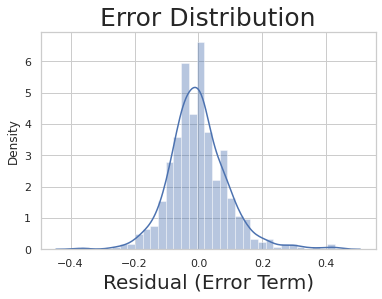

In [919]:
y_train_pred = lr_model.predict(X_train_sm)
residual = y_train_pred - y_train
sns.distplot(residual)
plt.xlabel('Residual (Error Term)', fontdict={'fontsize': 20})
plt.title('Error Distribution', fontdict={'fontsize': 25})
plt.show()

### Observations:
1. It is clear from the above graph that error distribution is normally distributed across 0, hence the assumption is correct.

### Assumption of Error Terms Being Independent

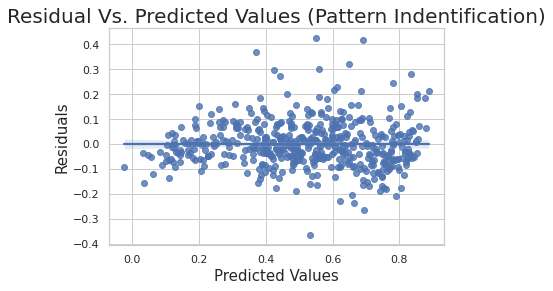

In [920]:
sns.regplot(x=y_train_pred, y=residual)
plt.title('Residual Vs. Predicted Values (Pattern Indentification)', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

In [921]:
from scipy.stats import pearsonr

pearsonr(y_train_pred, residual)[0]

1.4480604215716397e-15

### Observations:
1. There is almost no relation between Residual & Predicted Value.
2. Prerson value is also zero for predicted value vs residual.

### Homoscedasticity

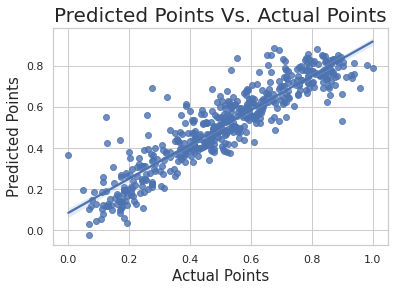

In [922]:
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Points', fontdict={'fontsize': 15})
plt.show()

### Observations:
1. Residuals are equally distributed across predicted value.
2. We see equal variance and do not observe high/low concentration of data points in any region.
3. Which means the Hososcedasticity holds true.

### Multicorrelation

In [923]:
vif_of_df(X_train_rfe)

,Features,VIF
0,temp,4.67
1,windspeed,4.00
2,yr,2.06
3,season_spring,1.65
4,weathersit_Mist_Cloudy,1.51
5,season_winter,1.40
6,mnth_july,1.35
7,mnth_sep,1.20
8,weekday_tue,1.17
9,weathersit_Light_Snow_Rain,1.08


In [924]:
corr_dict = {index: round(pearsonr(y_train, X_train_rfe[index])[0], 2) for index in X_train_rfe.columns}
corr_df = pd.DataFrame(corr_dict.values(), index=corr_dict.keys(), columns=['Correlation_Coefficient'])
corr_df.iloc[(-corr_df['Correlation_Coefficient'].abs()).argsort()]

,Correlation_Coefficient
temp,0.64
yr,0.59
season_spring,-0.55
windspeed,-0.25
weathersit_Light_Snow_Rain,-0.23
mnth_sep,0.20
weathersit_Mist_Cloudy,-0.18
mnth_july,0.16
weekday_tue,-0.06
season_winter,0.03


### Observations:
1. Indivual features correlation co-efficients which are impacting target variables.
2. As VIF is low than 5, this assumption holds true.

## Prediction on test data

In [925]:
# Transforming the test data

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head(10)

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,0,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,1,0,0,0,0,0,0
404,1,0,1,0.256524,0.579218,0.326196,0.438104,1,0,0,...,0,0,0,1,0,0,0,0,0,0
198,0,0,1,0.856704,0.671103,0.372990,0.510354,0,0,0,...,0,0,0,0,0,0,0,1,0,0
171,0,0,1,0.774672,0.793903,0.276724,0.553728,0,0,0,...,0,0,0,0,0,1,0,0,0,1
512,1,1,0,0.814131,0.696865,0.331536,0.692706,0,1,0,...,0,0,0,0,0,0,0,1,0,0
200,0,0,1,0.883701,0.728638,0.153738,0.495858,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [926]:
# Dividing into X and Y sets for the model testing

y_test = df_test.pop('cnt')
X_test = df_test

In [927]:
# Taking only the features used for training

X_test_new = X_test[X_train_rfe.columns]
X_test_new = sm.add_constant(X_test_new)

In [928]:
# Predict the test data using the final trained model

y_test_pred = lr_model.predict(X_test_new)

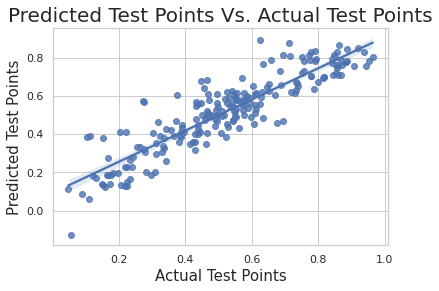

In [929]:
corr_plot = sns.regplot(x=y_test, y=y_test_pred)
plt.title('Predicted Test Points Vs. Actual Test Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Test Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Test Points', fontdict={'fontsize': 15})
plt.show()

### Observations:
1. The plot shows linear relationship between actuall and predicted test data points

## R-Square calculation

In [930]:
from sklearn.metrics import r2_score

In [931]:
# r square
r2_score(y_test, y_test_pred)

0.8086992490628286

In [932]:
# adjusted r square which depends on number of predictors used in model
1 - ( 1-r2_score(y_test, y_test_pred) ) * ( len(X_test_new) - 1 ) / ( len(X_test_new) - X_test_new.shape[1] - 1 )

0.7985335086748631

### Conclusion
1. The final 10 predictors for the models with there coorelation coefficient which shows how significant they are in describe the bike sharing demand: 

>-  Temparature: 0.64
>-  Year: 0.59
>-  Spring Season: -0.55
>-  Wind Speed: -0.25
>-  Light snow or rain: -0.23
>-  September Month: 0.20
>-  Mist cloudy weather: -0.18
>-  July Month: 0.16
>-  Tuesday: -0.06
>-  Winter Season: 0.03

2. Final Trained Model R-squared: **0.833**
3. Final Trained Model Adj. R-squared: **0.830**
4. Test data R-squared: **0.809**
5. Test data Adj. R-squared: **0.798**

